###로지스틱 회귀


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt


x = [2, 4, 5, 7, 8, 10, 25]
x = np.array(x)
y = [0, 0, 0, 1, 1, 1, 1]
y = np.array(y)

model = Sequential()
model.add(Dense(10, input_dim=1))
model.add(Dense(1, input_dim=1 ,activation="sigmoid"))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='acc', min_delta=0,
                               patience=300, verbose=0, mode='auto')

hist = model.fit(x, y, epochs=3000, batch_size=10, callbacks=[early_stopping])

#model.fit(x, y, epochs=2000)

#model.get_weights()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
7/7 [==============================] - 1s 75ms/step - loss: 0.5449 - acc: 0.5714
Epoch 2/3000
7/7 [==============================] - 0s 1ms/step - loss: 0.5433 - acc: 0.5714
Epoch 3/3000
7/7 [==============================] - 0s 1ms/step - loss: 0.5426 - acc: 0.5714
Epoch 4/3000
7/7 [==============================] - 0s 724us/step - loss: 0.5421 - acc: 0.5714
Epoch 5/3000
7/7 [==============================] - 0s 873us/step - loss: 0.5414 - acc: 0.5714
Epoch 6/3000
7/7 [==============================] - 0s 1ms/step - loss: 

In [0]:
print(model.predict_classes(np.array([35])))
print(model.predict_classes(np.array([3])))
print(model.predict_classes(np.array([6])))
print(model.predict_classes(np.array([5])))
print(model.predict(np.array([5])))
print(model.predict(np.array([6])))
model.evaluate(x, y)

[[1]]
[[0]]
[[1]]
[[0]]
[[0.3324046]]
[[0.57650596]]
7/7 [==============================] - 0s 23ms/step


[0.1343187540769577, 1.0]

###소프트맥스 분류

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

x_data = np.array([[1, 2, 1, 1],
                   [2, 1, 3, 2],
                   [3, 1, 3, 4],
                   [4, 1, 5, 5],
                   [1, 7, 5, 5],
                   [1, 2, 5, 6],
                   [1, 6, 6, 6],
                   [1, 7, 7, 7]],
                  dtype=np.float32)

y_data = np.array([[0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1],
                   [0, 1, 0],
                   [0, 1, 0],
                   [0, 1, 0],
                   [1, 0, 0],
                   [1, 0, 0]],
                  dtype=np.float32)

model = Sequential()
model.add(Dense(3, input_shape=(4,)))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_data, y_data, epochs=1000)

print(model.predict_classes(np.array([[1, 2, 1, 1]])))
print(model.predict_classes(np.array([[1, 2, 5, 6]])))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 15        
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
8/8 [==============================] - 0s 9ms/sample - loss: 2.2112 - acc: 0.2500
Epoch 2/1000
8/8 [==============================] - 0s 467us/sample - loss: 2.1063 - acc: 0.2500
Epoch 3/1000
8/8 [==============================] - 0s 358us/sample - loss: 2.0251 - acc: 0.2500
Epoch 4/1000
8/8 [==============================] - 0s 411us/sample - loss: 1.9629 - acc: 0.1250
Epoch 5/1000
8/8 [==============================] - 0s 422us/sample - loss: 1.9152 - acc: 0.2500
Epoch 6/1000
8/8 [===================

In [0]:
print(np.array(9))

9


In [0]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


import numpy as np


# local minimal에 빠지므로 정규화 할 것
x = [[85, 100,],
     [100, 92],
     [77, 62],
     [62, 56],
     [32, 59],
     [13, 68]
    ]

y = [[1,0,0],
     [1,0,0],
     [0,1,0],
     [0,1,0],
     [0,0,1],
     [0,0,1]
     ]
x = np.array(x)
y = np.array(y)

model = Sequential()
model.add(Dense(3,  input_shape=(2,), activation='softmax'))
sgd = SGD(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.fit(x, y, epochs=1000)

Epoch 1/1000
6/6 [==============================] - 0s 12ms/sample - loss: 29.9510 - acc: 0.3333
Epoch 2/1000
6/6 [==============================] - 0s 861us/sample - loss: 25.9148 - acc: 0.3333
Epoch 3/1000
6/6 [==============================] - 0s 669us/sample - loss: 21.8785 - acc: 0.3333
Epoch 4/1000
6/6 [==============================] - 0s 726us/sample - loss: 17.8423 - acc: 0.3333
Epoch 5/1000
6/6 [==============================] - 0s 629us/sample - loss: 13.8088 - acc: 0.3333
Epoch 6/1000
6/6 [==============================] - 0s 549us/sample - loss: 9.9488 - acc: 0.5000
Epoch 7/1000
6/6 [==============================] - 0s 501us/sample - loss: 6.9545 - acc: 0.5000
Epoch 8/1000
6/6 [==============================] - 0s 477us/sample - loss: 4.2935 - acc: 0.5000
Epoch 9/1000
6/6 [==============================] - 0s 462us/sample - loss: 2.6978 - acc: 0.3333
Epoch 10/1000
6/6 [==============================] - 0s 677us/sample - loss: 2.4460 - acc: 0.3333
Epoch 11/1000
6/6 [======

In [0]:
print(model.predict(np.array([[100, 100]])))
print(model.predict_classes(np.array([[100, 100]])))
print(model.predict(np.array([[50, 50]])))
print(model.predict_classes(np.array([[50, 50]])))
print(model.predict(np.array([[10, 100]])))
print(model.predict_classes(np.array([[10, 100]])))
print(model.predict(np.array([[70, 30]])))
print(model.predict_classes(np.array([[70, 30]])))
print(model.predict(np.array([[10, 10]])))
print(model.predict_classes(np.array([[10, 10]])))

[[9.6977049e-01 3.0198911e-02 3.0631400e-05]]
[0]
[[0.84010947 0.15504107 0.00484951]]
[0]
[[2.719480e-11 2.847293e-28 1.000000e+00]]
[2]
[[3.5295329e-07 9.9999964e-01 3.2947206e-15]]
[1]
[[0.4676254  0.35829386 0.17408076]]
[0]


###필터

In [0]:
# # 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 설정함
# import tensorflow as tf

# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.Session(config=config)

In [0]:
# 동일한 결과를 재현하기 위해서 random seed 고정
import numpy as np

np.random.seed(777)

In [0]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

# 1. 데이터 준비

In [0]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = (
    boston_housing.load_data()
    )

In [0]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [0]:
print(train_targets) # 단위: 천 달러

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

# 2. 데이터 전처리

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

# 테스트 셋도 훈련 셋에서 계산된 mean과 std를 동일하게 사용함
# 만약 각각 정규화를 수행해버리면, 학습 결과 적용이 불가능해짐
test_data -= mean
test_data /= std

# 3. 네트워크 정의

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(1)) # 회귀 모델 (출력층에 활성화 함수 없음)
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

# 4. (K-겹 교차 검증을 사용한) 모델 학습

In [0]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('>> fold ', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                         train_data[(i+1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                            train_targets[(i+1) * num_val_samples:]],
                                           axis=0)
    
    model = build_model()
    model.fit(partial_train_data, 
              partial_train_targets,
              epochs = num_epochs,
              batch_size = 1,
              verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

print('finished!!')

>> fold  0
>> fold  1
>> fold  2
>> fold  3
finished!!


In [0]:
print(all_scores)
mean = np.mean(all_scores)
stddev = np.std(all_scores)

print(u'%.2f \u00B1(%.2f)'%(mean, stddev))

[2.2990584, 2.3741825, 2.7630827, 2.3957465]
2.46 ±(0.18)


In [0]:
'''
4-fold의 평균 validation MAE 그래프 그리기
'''

print(model.metrics_names)

['loss', 'mean_absolute_error']


In [0]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('>> fold ', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                         train_data[(i+1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                            train_targets[(i+1) * num_val_samples:]],
                                           axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, 
                     partial_train_targets,
                     epochs = num_epochs,
                     batch_size = 1,
                     verbose = 0,
                     validation_data = (val_data, val_targets))
    
    mae_history = hist.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    
print('finished!!')

>> fold  0
>> fold  1
>> fold  2
>> fold  3
finished!!


In [0]:
print(all_mae_histories)

[[4.2493687, 3.195008, 2.724725, 2.5568573, 2.3489282, 2.236472, 2.235657, 2.243416, 2.1283557, 2.212059, 2.259313, 2.1569798, 2.044466, 2.3455095, 2.2570503, 2.0277185, 2.0882916, 1.9444216, 2.0421374, 2.1348236, 2.0634818, 2.000243, 1.9654553, 2.126186, 1.9617438, 1.9332068, 1.9543756, 2.1248813, 1.9148847, 1.9144145, 2.1722298, 1.8603129, 2.1415634, 1.9994237, 1.9448451, 1.78034, 2.088846, 2.1025562, 1.6934276, 2.0412984, 1.9266899, 1.9279927, 2.3867955, 1.9022256, 1.8879501, 1.8475134, 1.9617813, 1.9512757, 1.9709785, 1.8738924, 1.9217087, 1.8478112, 1.9966124, 1.7288944, 2.019156, 2.1167622, 1.7940747, 1.8758279, 1.8427258, 1.7692853, 1.9410639, 2.1522512, 2.0547438, 1.9042097, 1.8262227, 1.9985348, 1.96748, 1.7871574, 2.0817156, 2.0478506, 1.952215, 1.8365835, 1.771135, 2.2850318, 2.0809963, 2.1403816, 1.8964226, 2.405734, 2.5182245, 2.1620786, 2.0333157, 2.063167, 2.1158614, 1.7548397, 2.0878015, 2.0875072, 2.0673573, 1.8897039, 2.0119975, 2.0194974, 2.2110703, 2.047602, 2.03633

In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

print(average_mae_history)

[4.3639574, 3.3846626, 2.9729278, 2.85006, 2.7384372, 2.6793196, 2.7792385, 2.6166978, 2.5738497, 2.5919166, 2.574174, 2.492647, 2.5072474, 2.5910604, 2.6008332, 2.4883401, 2.5202358, 2.3926544, 2.5084822, 2.4813747, 2.4226153, 2.4067512, 2.423238, 2.5752206, 2.3985245, 2.4150546, 2.4823098, 2.3965554, 2.2882237, 2.3313668, 2.4906924, 2.2896352, 2.3741326, 2.5187688, 2.4389706, 2.3723295, 2.4240677, 2.37562, 2.4511707, 2.4243617, 2.3659213, 2.380578, 2.4577377, 2.3527515, 2.3185003, 2.3471613, 2.3885458, 2.3020988, 2.3982239, 2.3273666, 2.3660207, 2.4309072, 2.3771932, 2.2993608, 2.4360583, 2.374343, 2.3751886, 2.2960885, 2.4369047, 2.3160133, 2.3043706, 2.4284525, 2.3351085, 2.4548998, 2.365426, 2.3569486, 2.3592012, 2.295397, 2.3945525, 2.4084954, 2.409183, 2.3651252, 2.367939, 2.551463, 2.4198132, 2.4847264, 2.3189104, 2.4720576, 2.5573118, 2.4063544, 2.5739684, 2.4279752, 2.440471, 2.3632612, 2.4218745, 2.4857233, 2.46848, 2.3805723, 2.50311, 2.347423, 2.4032028, 2.3834884, 2.38113

In [0]:
average_mae_history = []
for epoch in range(num_epochs):
    average_mae_per_epoch = []
    
    for mae_history in all_mae_histories: # 4개 fold 반복
        average_mae_per_epoch.append(mae_history[epoch])
    
    mean = np.mean(average_mae_per_epoch)
    average_mae_history.append(mean)

print(average_mae_history)

In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

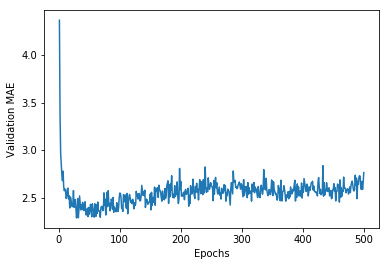

In [0]:
import matplotlib.pyplot as plt

# matplotlib이 Jupyter notebook 셀 안에서 생성되도록 함
# https://versusall.tistory.com/entry/Jupyter-Notebook-4-%EC%99%B8%EB%B6%80%EC%B0%BD%EC%97%90%EC%84%9C-%EA%B7%B8%EB%9E%98%ED%94%84-%EA%B7%B8%EB%A6%AC%EA%B8%B0-matplotlib-inline-qt-tk%C2%B6
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

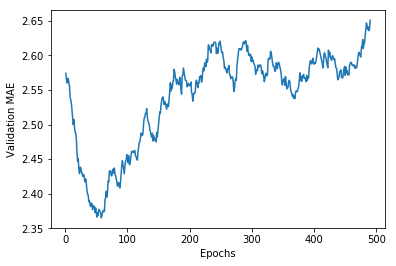

In [0]:
'''
시계열 신호에 지수 이동 평균(exponential moving averge) 필터링
'''
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            prev = smoothed_points[-1]
            smoothed_points.append(prev*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# 5. (과대적합 되기 전까지) 모델 학습

In [0]:
# 기존 model 객체를 사용하면 이어서 학습되므로, 새로운 model 객체를 생성함
model = build_model()
model.fit(train_data, 
          train_targets,
          epochs = 80,
          batch_size = 16,
          verbose = 1)

Epoch 1/80
404/404 [==============================] - 0s 628us/sample - loss: 484.6319 - mean_absolute_error: 20.2027
Epoch 2/80
404/404 [==============================] - 0s 210us/sample - loss: 295.7124 - mean_absolute_error: 15.0465
Epoch 3/80
404/404 [==============================] - 0s 217us/sample - loss: 123.9265 - mean_absolute_error: 8.8103
Epoch 4/80
404/404 [==============================] - 0s 221us/sample - loss: 46.6621 - mean_absolute_error: 5.0508
Epoch 5/80
404/404 [==============================] - 0s 229us/sample - loss: 31.3416 - mean_absolute_error: 3.9676
Epoch 6/80
404/404 [==============================] - 0s 223us/sample - loss: 25.3987 - mean_absolute_error: 3.5734
Epoch 7/80
404/404 [==============================] - 0s 267us/sample - loss: 22.2653 - mean_absolute_error: 3.2806
Epoch 8/80
404/404 [==============================] - 0s 256us/sample - loss: 19.9635 - mean_absolute_error: 3.1015
Epoch 9/80
404/404 [==============================] - 0s 225us/samp

# 6. 테스트셋으로 성능 평가하기

In [0]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print('test MSE score: %.3f'% test_mse_score)
print('test MAE score: %.3f'% test_mae_score)

102/102 [==============================] - 0s 1ms/sample - loss: 16.8671 - mean_absolute_error: 2.5413
test MSE score: %.3f 16.867078294941024
test MAE score: %.3f 2.5412843


In [0]:
from keras.models import Sequential


model = Sequential()
model.evaluate?

In [6]:
model.

Object `model.metrics_names` not found.
